# UDOM, JOSHUA SUNDAY
# 22/EG/CO/1729

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copy of Superstore.csv')

In [50]:
data[['Order ID', 'Order Date', 'Sales', 'Quantity', 'Discount', 'Profit']].head(4)


,Order ID,Order Date,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/2016,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,957.5775,5,0.45,-383.0310


In [52]:
data[['Order ID', 'Order Date', 'Sales', 'Quantity', 'Discount', 'Profit']].sample(4)


,Order ID,Order Date,Sales,Quantity,Discount,Profit
5997,CA-2016-162187,12/11/2016,328.59,3,0.4,-147.8655
6908,US-2017-135503,12/10/2017,14.76,2,0.0,4.2804
1684,CA-2017-149489,4/24/2017,99.28,2,0.2,12.4100
2636,CA-2015-162369,8/15/2015,323.10,2,0.0,61.3890


4. Standardize/normalize column names to have lowercase characters

In [53]:
data.columns = data.columns.str.lower().str.replace(' ', '_').str.replace('-', '_')

In [54]:
data.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

5. Total number of samples, columns, and memory usage of the dataset

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         9994 non-null   int64  
 1   order_id       9994 non-null   object 
 2   order_date     9994 non-null   object 
 3   ship_date      9994 non-null   object 
 4   ship_mode      9994 non-null   object 
 5   customer_id    9994 non-null   object 
 6   customer_name  9994 non-null   object 
 7   segment        9994 non-null   object 
 8   country        9994 non-null   object 
 9   city           9994 non-null   object 
 10  state          9994 non-null   object 
 11  postal_code    9994 non-null   int64  
 12  region         9994 non-null   object 
 13  product_id     9994 non-null   object 
 14  category       9994 non-null   object 
 15  sub_category   9994 non-null   object 
 16  product_name   9994 non-null   object 
 17  sales          9994 non-null   float64
 18  quantity

In [56]:

data.select_dtypes(include='float').shape[1], data.select_dtypes(include='int64').shape[1], data.select_dtypes(include='object').shape[1]

(3, 3, 15)

In [57]:
data.select_dtypes(include='object').describe()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,region,product_id,category,sub_category,product_name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,1334,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,35,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [58]:
cols = ['order_date', 'ship_date', 'country', 'city', 'state', 'product_name']
data[cols].describe()

,order_date,ship_date,country,city,state,product_name
count,9994,9994,9994,9994,9994,9994
unique,1237,1334,1,531,49,1850
top,9/5/2016,12/16/2015,United States,New York City,California,Staple envelope
freq,38,35,9994,915,2001,48


In [59]:
data['segment'].value_counts()

segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

In [60]:
data['country'].value_counts()

country
United States    9994
Name: count, dtype: int64

In [61]:
data['region'].value_counts()

region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

In [62]:
data.describe()

,row_id,postal_code,sales,quantity,discount,profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [63]:
data.groupby('region')['sales'].sum()


region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: sales, dtype: float64

In [64]:
data.groupby('category')['profit'].sum()

category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: profit, dtype: float64

In [65]:
data.groupby('discount')['sales'].mean().sort_index()

discount
0.00    226.742074
0.10    578.397351
0.15    529.971567
0.20    209.076940
0.30    454.742974
0.32    536.794770
0.40    565.134874
0.45    498.634000
0.50    892.705152
0.60     48.150000
0.70     97.177708
0.80     56.545853
Name: sales, dtype: float64

In [66]:
data.groupby('ship_mode')['profit'].mean().sort_index()

ship_mode
First Class       31.839948
Same Day          29.266591
Second Class      29.535545
Standard Class    27.494770
Name: profit, dtype: float64

In [67]:
data.groupby('segment')['order_id'].nunique()

segment
Consumer       2586
Corporate      1514
Home Office     909
Name: order_id, dtype: int64

In [68]:
data[['sales', 'profit', 'quantity', 'discount']].corr()


,sales,profit,quantity,discount
sales,1.000000,0.479064,0.200795,-0.028190
profit,0.479064,1.000000,0.066253,-0.219487
quantity,0.200795,0.066253,1.000000,0.008623
discount,-0.028190,-0.219487,0.008623,1.000000


In [69]:
data[['sales', 'profit', 'quantity', 'discount']].skew()

sales       12.972752
profit       7.561432
quantity     1.278545
discount     1.684295
dtype: float64

20. Number of orders for each product where discount was less than 20%

In [70]:
filtered = data[data['discount'] < 0.2]
filtered.groupby('product_name')['order_id'].nunique().sort_values(ascending=False)

product_name
Easy-staple paper                                                      32
Staple envelope                                                        30
Staples                                                                23
Staples in misc. colors                                                13
Staple holder                                                          10
                                                                       ..
Samsung HM1900 Bluetooth Headset                                        1
Samsung Galaxy S4                                                       1
Samsung Galaxy Note 3                                                   1
Samsung Convoy 3                                                        1
Sannysis Cute Owl Design Soft Skin Case Cover for Samsung Galaxy S4     1
Name: order_id, Length: 1645, dtype: int64

In [71]:
state_sales = data.groupby('state')['sales'].sum().sort_values(ascending=False)

state_sales.to_csv('total_sales_by_state.csv', index=True)


In [72]:
data['discount'].value_counts().idxmax()

np.float64(0.0)

In [73]:
data['discount'].value_counts().max()

np.int64(4798)

23. Region that has the highest total profit, and the profit amount

In [74]:
region_profit = data.groupby('region')['profit'].sum()

# Region with highest profit
top_region = region_profit.idxmax()
top_profit = region_profit.max()

print(f"Region with highest profit: {top_region}")
print(f"Total profit: ${top_profit:,.2f}")


Region with highest profit: West
Total profit: $108,418.45


In [75]:
region_sales = data.groupby('region')['sales'].sum().sort_values(ascending=False)
region_profit = data.groupby('region')['profit'].sum().sort_values(ascending=False)

top_sales_region = region_sales.idxmax()

sales_ranking = region_sales.reset_index().reset_index().set_index('region')['index'] + 1
profit_ranking = region_profit.reset_index().reset_index().set_index('region')['index'] + 1

profit_rank_of_top_sales_region = profit_ranking[top_sales_region]
sales_rank_of_top_sales_region = sales_ranking[top_sales_region]

rank_difference = abs(sales_rank_of_top_sales_region - profit_rank_of_top_sales_region)

print(f"Region with highest sales: {top_sales_region}")
print(f"Profit rank of {top_sales_region}: {profit_rank_of_top_sales_region}")
print(f"Difference in profit ranking: {rank_difference}")


Region with highest sales: West
Profit rank of West: 1
Difference in profit ranking: 0


25. The distribution of discount levels beyond the top few

In [76]:
discount = data['discount'].value_counts().sort_values(ascending=False)
print(discount)

discount
0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: count, dtype: int64


<Axes: title={'center': 'Top 10 Most Profitable Products'}, xlabel='product_id'>

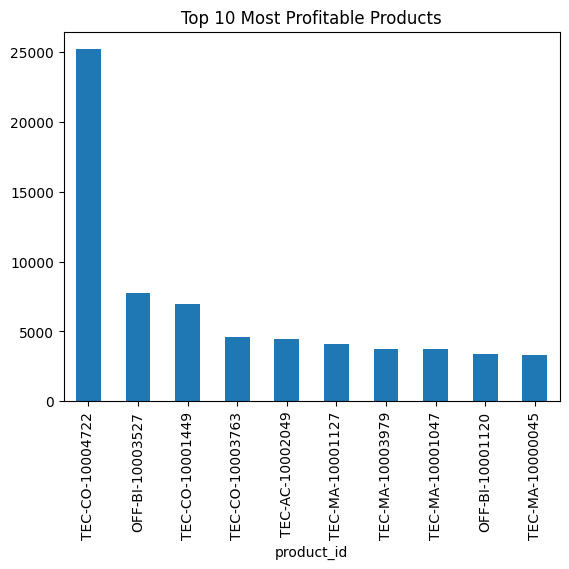

In [77]:
profit = data.groupby('product_id')['profit'].sum().sort_values(ascending=False).head(10)
profit.plot(kind='bar', title='Top 10 Most Profitable Products')


In [78]:
loss_regions = data[data['profit'] < 0].groupby('region')['profit'].mean()
print(loss_regions.sort_values())


region
South     -106.196264
East       -89.675601
Central    -75.998495
West       -71.449563
Name: profit, dtype: float64


Text(0.5, 1.0, 'Profit Distribution by Segment')

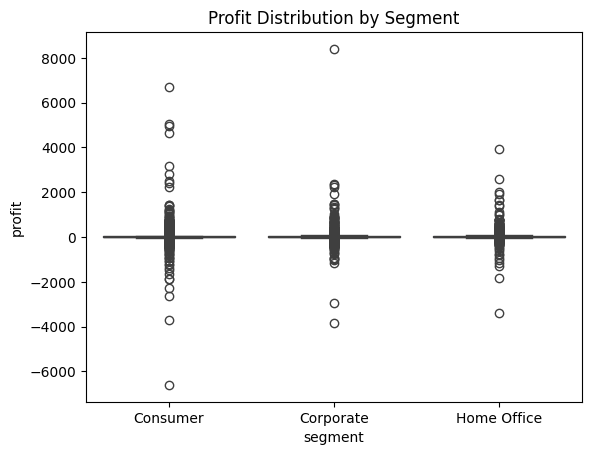

In [79]:
sns.boxplot(data=data, x='segment', y='profit')
plt.title('Profit Distribution by Segment')


The approximate median profit values, estimated interquartile ranges and the characteristics of the outliers(presence, number, and magnitude)

In [80]:
data.groupby('segment')['profit'].median()
data.groupby('segment')['profit'].quantile([0.25, 0.75])

segment          
Consumer     0.25     1.58355
             0.75    28.60670
Corporate    0.25     1.92840
             0.75    29.84350
Home Office  0.25     1.98425
             0.75    31.55985
Name: profit, dtype: float64

4. Scatter Plot: Discount vs Profit

Text(0.5, 1.0, 'Discount vs Profit')

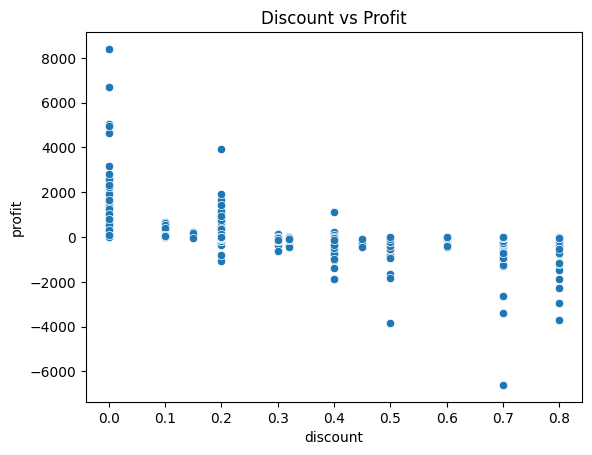

In [81]:
sns.scatterplot(data=data, x='discount', y='profit')
plt.title('Discount vs Profit')


 5. Bar Chart: Sales by Region

<Axes: title={'center': 'Sales by Region'}, xlabel='region'>

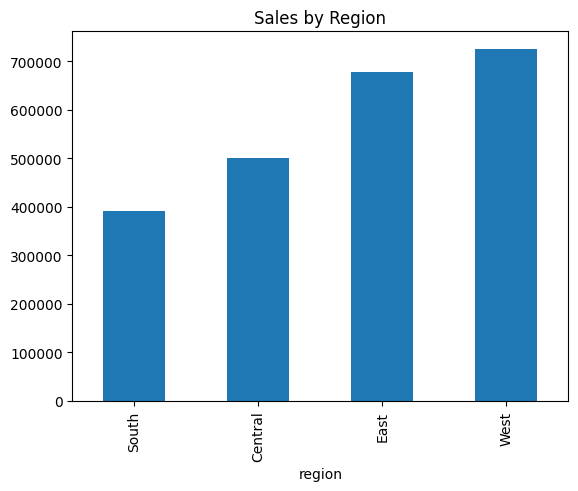

In [82]:
data.groupby('region')['sales'].sum().sort_values().plot(kind='bar', title='Sales by Region')


6. Bar Chart: Profit by Category

<Axes: title={'center': 'Profit by Category'}, xlabel='category'>

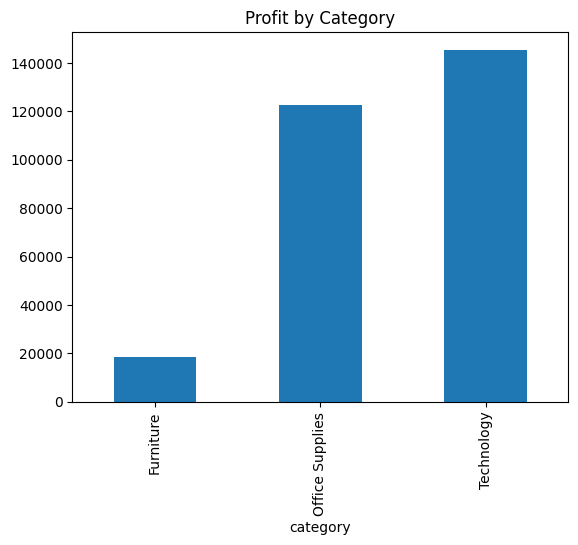

In [83]:
data.groupby('category')['profit'].sum().plot(kind='bar', title='Profit by Category')

7. Bar Chart: Top 10 Customers by Order Count

<Axes: title={'center': 'Top 10 Customers by Orders'}, xlabel='customer_id'>

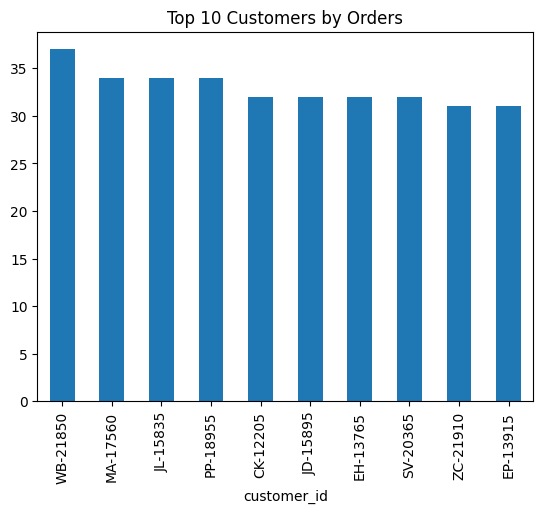

In [84]:
top_customers = data['customer_id'].value_counts().head(10)
top_customers.plot(kind='bar', title='Top 10 Customers by Orders')


 8. Heatmap: Sales by State and Category

<Axes: xlabel='category', ylabel='state'>

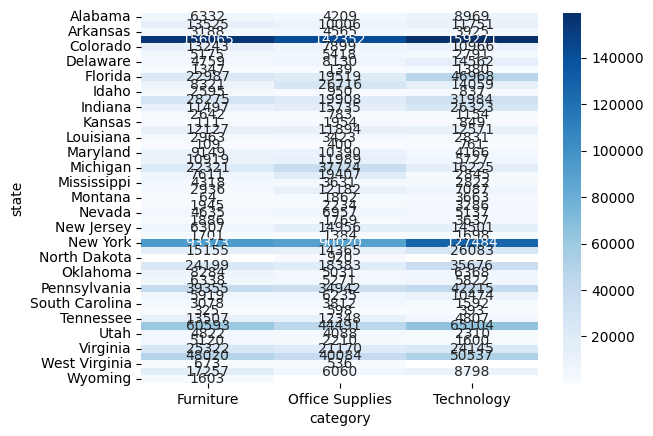

In [85]:
pivot = data.pivot_table(index='state', columns='category', values='sales', aggfunc='sum')
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='Blues')

9. Boxplot: Profit by Subcategory

Text(0.5, 1.0, 'Profit Distribution by Subcategory')

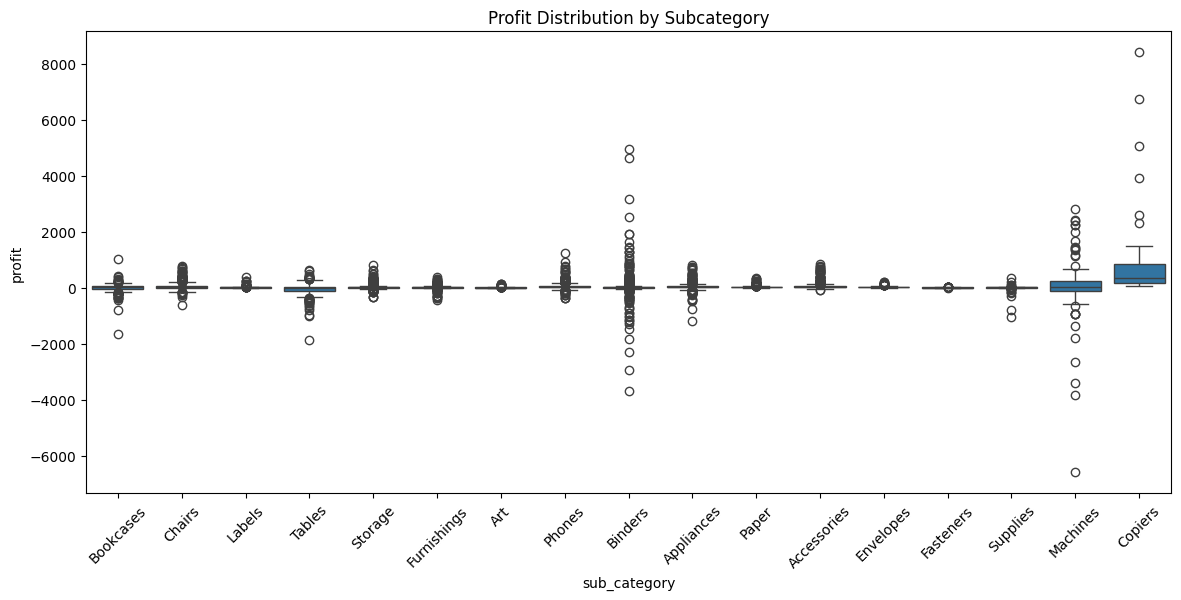

In [86]:
plt.figure(figsize=(14,6))
sns.boxplot(data=data, x='sub_category', y='profit')
plt.xticks(rotation=45)
plt.title("Profit Distribution by Subcategory")


10. Histogram: Profit Margin Distribution

Text(0.5, 1.0, 'Histogram of Profit Margins')

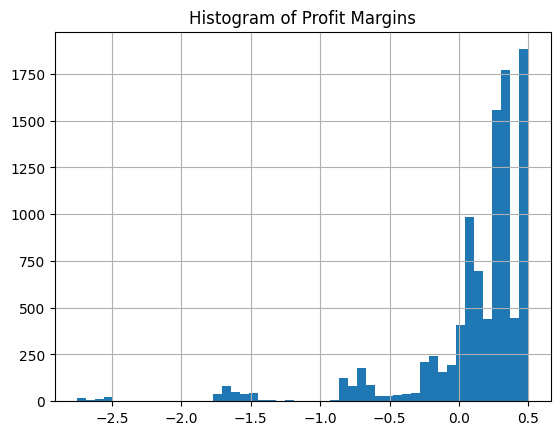

In [87]:
data['profit_margin'] = data['profit'] / data['sales']
data['profit_margin'].hist(bins=50)
plt.title("Histogram of Profit Margins")


11. KDE Plot: Profit Margin Distribution

Text(0.5, 1.0, 'KDE Plot of Profit Margin')

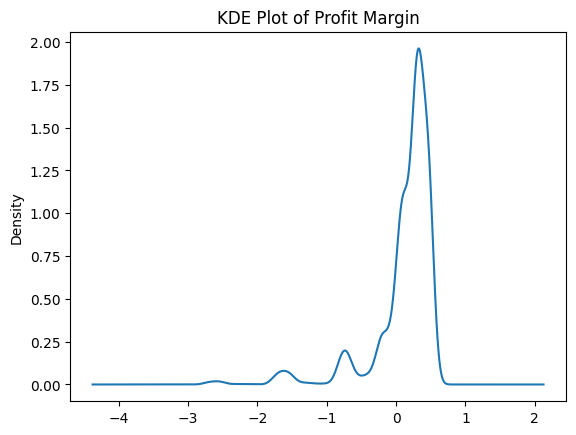

In [89]:
data['profit_margin'].plot(kind='kde')
plt.title("KDE Plot of Profit Margin")


 12. Bar Chart: Top 10 Customers by Sales

<Axes: title={'center': 'Top 10 Customers by Sales'}, xlabel='customer_id'>

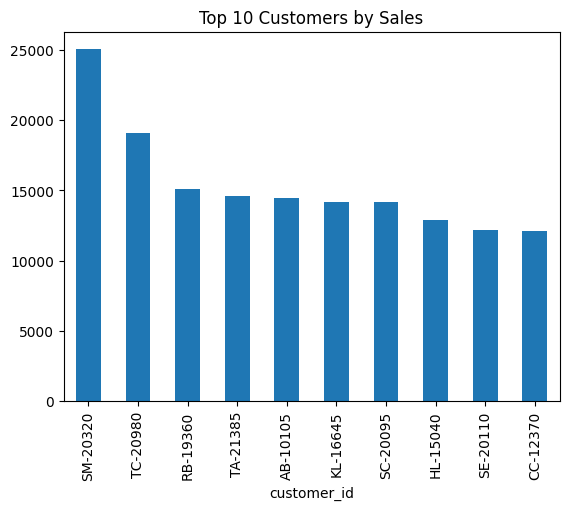

In [90]:
top_customers_sales = data.groupby('customer_id')['sales'].sum().sort_values(ascending=False).head(10)
top_customers_sales.plot(kind='bar', title='Top 10 Customers by Sales')


13. Bubble Chart: Sales vs Profit (Bubble = Quantity)

Text(0.5, 1.0, 'Sales vs Profit (Bubble Size = Quantity)')

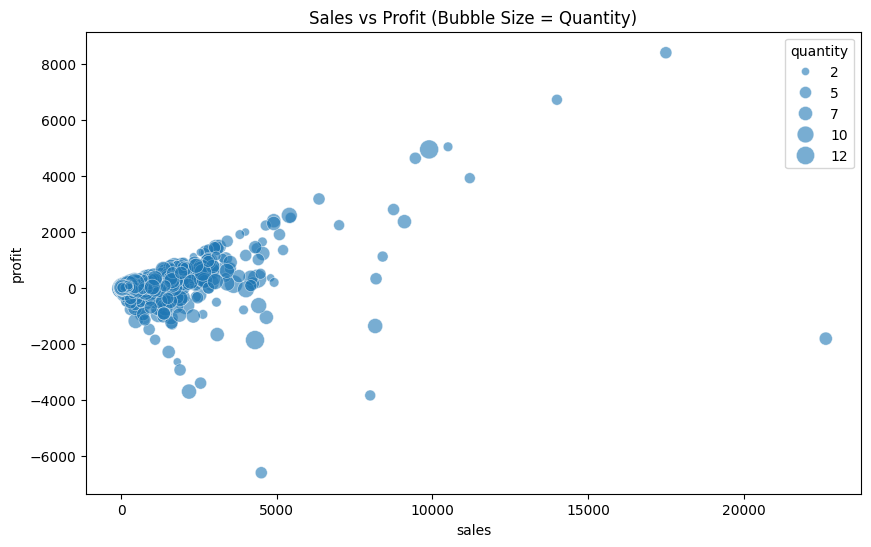

In [91]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='sales', y='profit', size='quantity', alpha=0.6, sizes=(20, 200))
plt.title('Sales vs Profit (Bubble Size = Quantity)')


 14. Line plot of Profit by Month (Colored by Year)

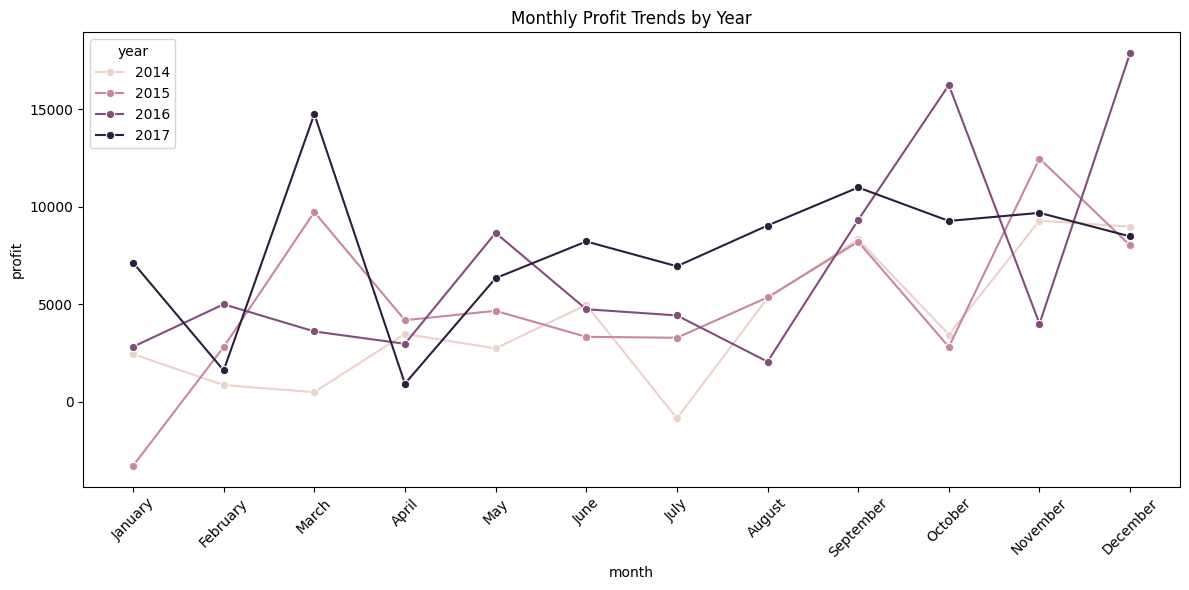

In [92]:
data['order_date'] = pd.to_datetime(data['order_date'])

data['year'] = data['order_date'].dt.year
data['month'] = data['order_date'].dt.month_name()

monthly_profit = data.groupby(['year', 'month'])['profit'].sum().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_profit['month'] = pd.Categorical(monthly_profit['month'], categories=month_order, ordered=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_profit.sort_values('month'), x='month', y='profit', hue='year', marker='o')
plt.title("Monthly Profit Trends by Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


15. Bar chart of Average Profit by Ship Mode

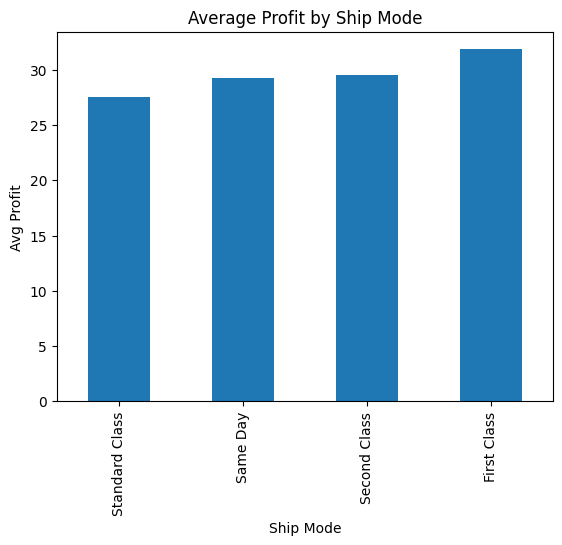

In [93]:
data.groupby('ship_mode')['profit'].mean().sort_values().plot(kind='bar', title='Average Profit by Ship Mode', ylabel='Avg Profit', xlabel='Ship Mode')
plt.show()

16. Bar chart of Sales by Category

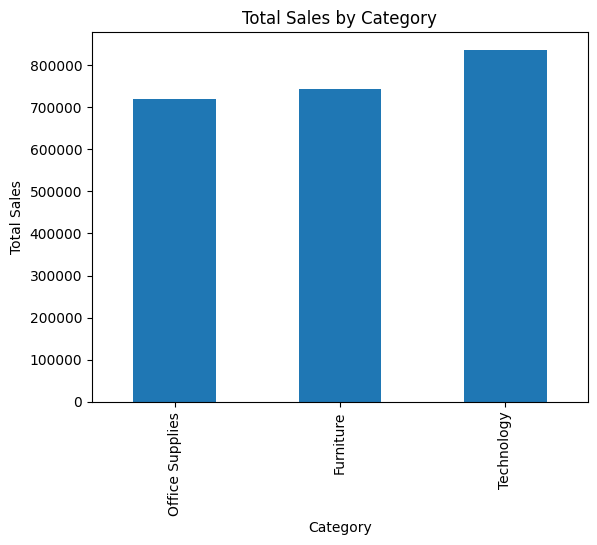

In [94]:
data.groupby('category')['sales'].sum().sort_values().plot(kind='bar', title='Total Sales by Category', ylabel='Total Sales', xlabel='Category')
plt.show()

 17. Heatmap of Profit by State Over Time

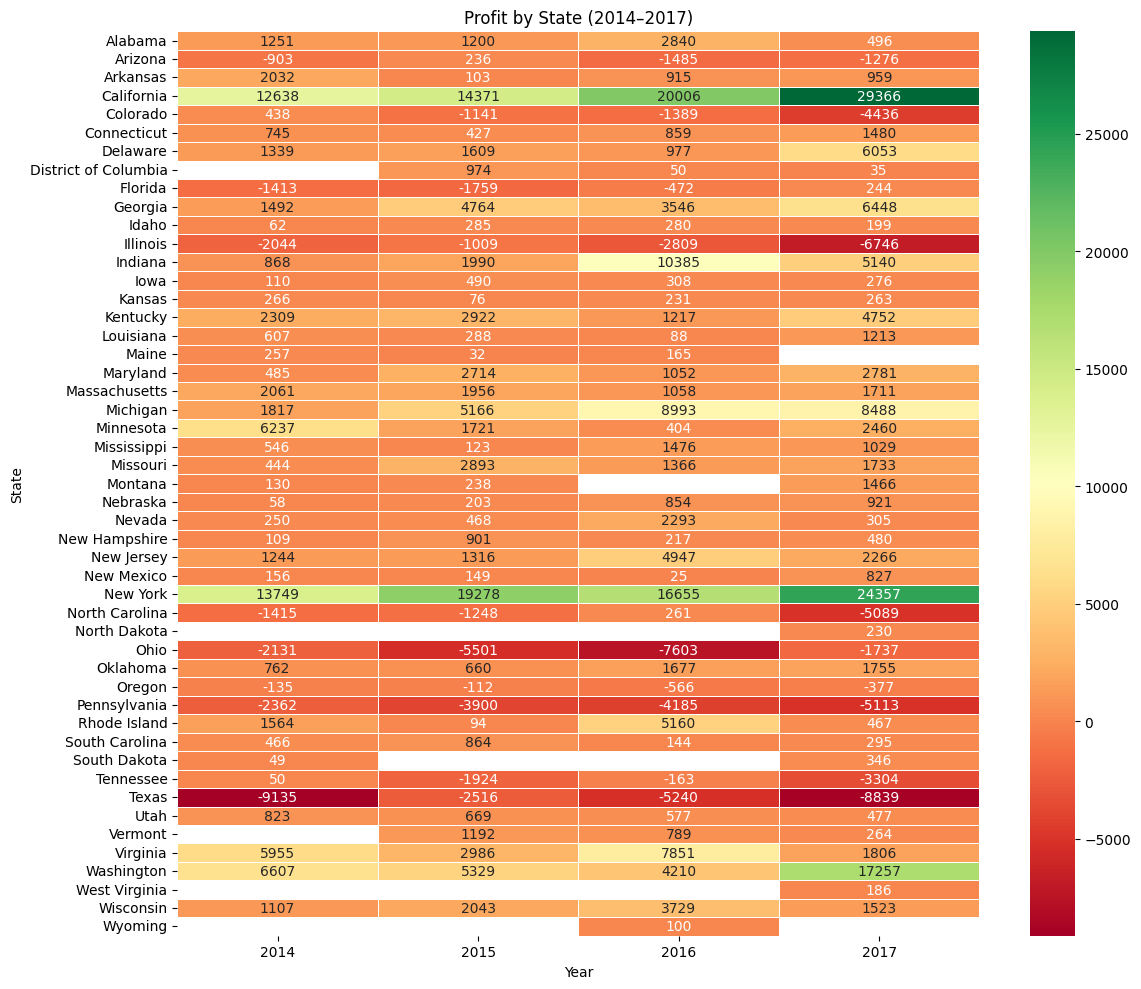

In [95]:
data['year'] = data['order_date'].dt.year
profit_pivot = data.pivot_table(index='state', columns='year', values='profit', aggfunc='sum')

plt.figure(figsize=(12, 10))
sns.heatmap(profit_pivot, annot=True, fmt=".0f", cmap='RdYlGn', linewidths=0.5)
plt.title("Profit by State (2014–2017)")
plt.ylabel("State")
plt.xlabel("Year")
plt.tight_layout()
plt.show()


18. Histogram of Customer Order Frequency with KDE

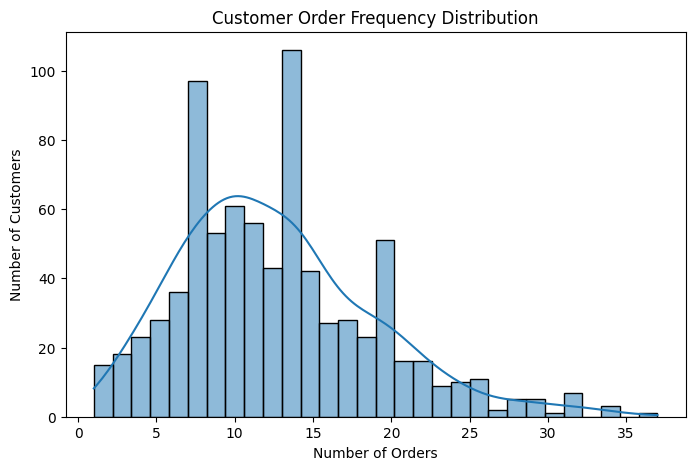

In [96]:
order_freq = data['customer_id'].value_counts()

plt.figure(figsize=(8, 5))
sns.histplot(order_freq, kde=True, bins=30)
plt.title("Customer Order Frequency Distribution")
plt.xlabel("Number of Orders")
plt.ylabel("Number of Customers")
plt.show()


19. Scatter Plot: Sales vs Profit by Product

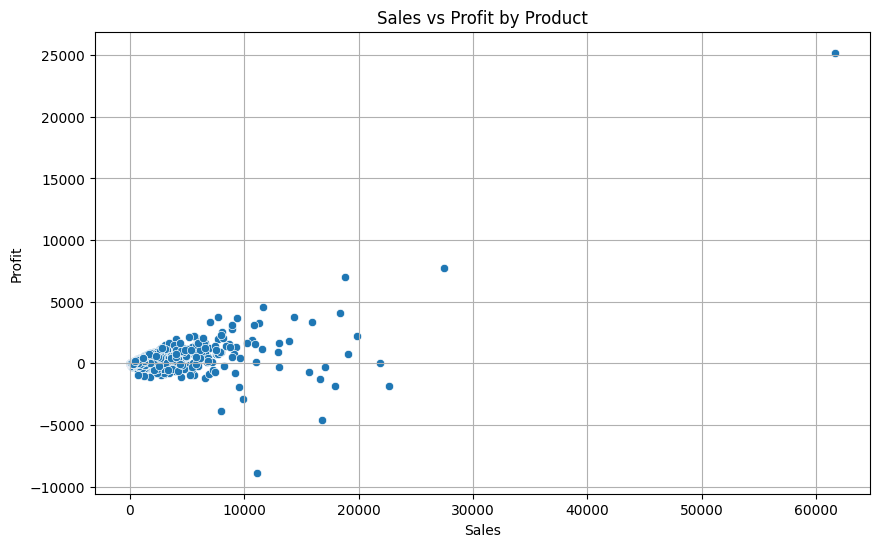

In [97]:
product_profit = data.groupby('product_name')[['sales', 'profit']].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=product_profit, x='sales', y='profit')
plt.title("Sales vs Profit by Product")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.grid(True)
plt.show()


20. Line Plot: Average Profit by Discount Level

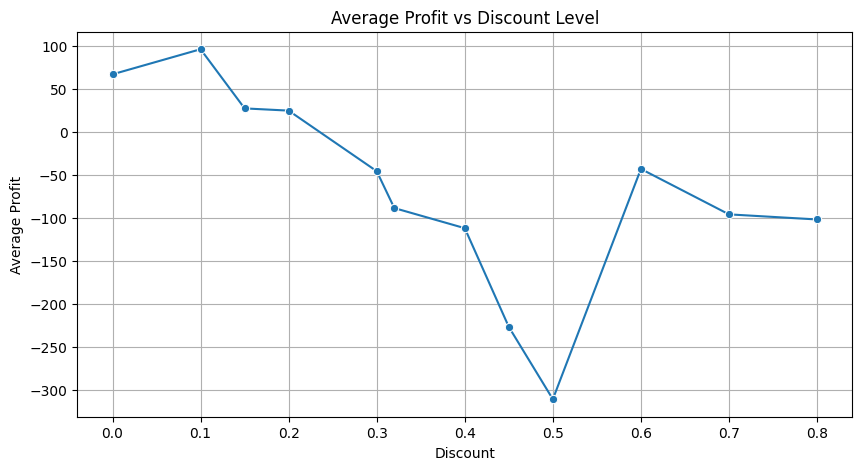

In [98]:
discount_profit = data.groupby('discount')['profit'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=discount_profit, x='discount', y='profit', marker='o')
plt.title("Average Profit vs Discount Level")
plt.xlabel("Discount")
plt.ylabel("Average Profit")
plt.grid(True)
plt.show()


21. Line Plot: Sales Trends by Region Over Time

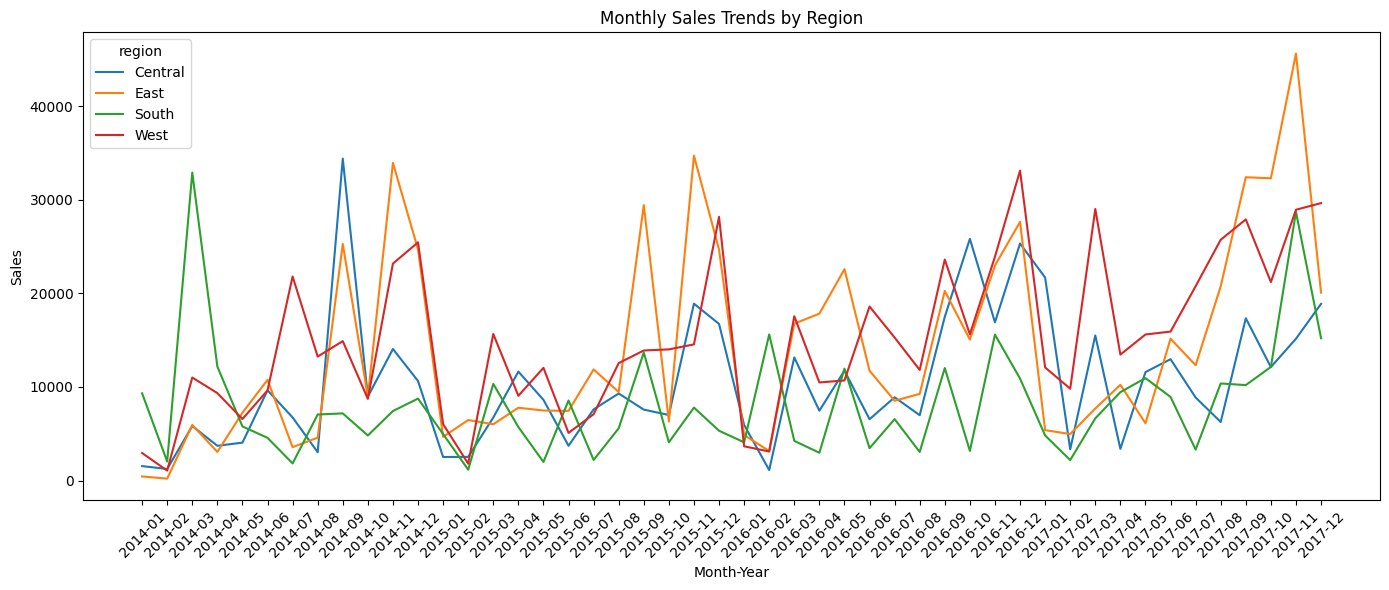

In [99]:
data['month_year'] = data['order_date'].dt.to_period('M').astype(str)
monthly_region_sales = data.groupby(['month_year', 'region'])['sales'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_region_sales, x='month_year', y='sales', hue='region')
plt.title("Monthly Sales Trends by Region")
plt.xlabel("Month-Year")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
